# <font color=blue> Earth Temperature and CO2 Emission Around the World </font>
 ## Introduction
### There is a rapid change in climate over the past few years. Despit everyone is talking about pollutions and its effects on our climate,  most of us are not doing anything about it. If we don’t get serious now, then it would be too late. Earth is our home so, let’s protect it together.

### In this Project, We are going to analyse and visualize  increasing the Earth tempertature and increasing Co2 emission from different countries around the world. Both analyse and visualization is going to answer on the main question: 
- Is Global Warming Real? If so, 
- Which countries ought to be most responsible about these changes? And 
- What should we do to take down the global Co2 emission rate?

### To Answer on these questions, we will analyse data <font color=blue>"GLB.Ts+dSST.csv"</font> which is taken from https://data.giss.nasa.gov/gistemp/ <br> 

### and data <font color=blue>"owid-co2-data.csv"</font> which is taken from kaggle or from githup https://github.com/owid/co2-data


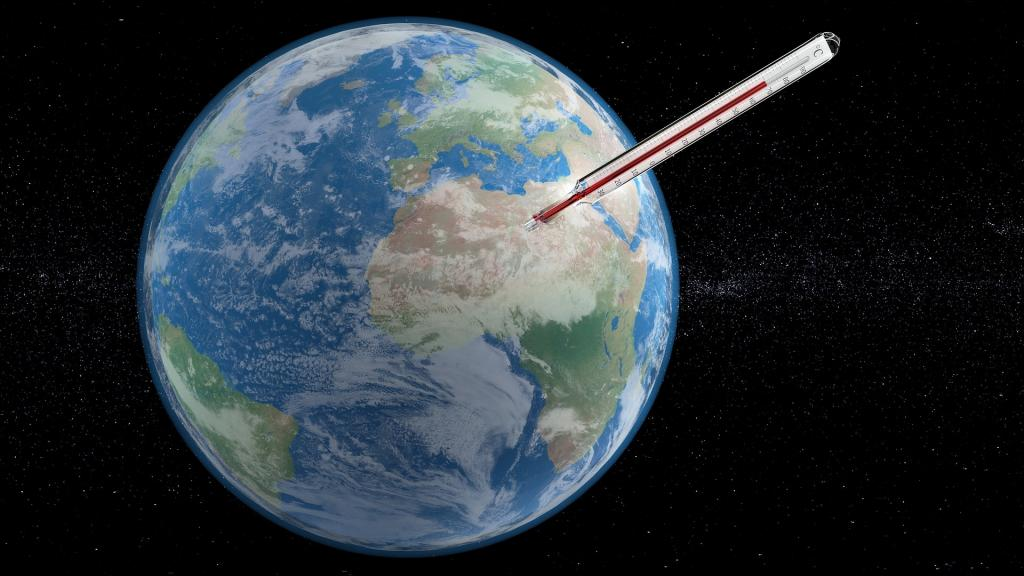

In [1]:
from IPython import display
display.Image("climate-change.jpg")

# <font color=blue>Describing the data </font>

In this Project we used two dataset the first on called <font color=blue>"GLB.Ts+dSST.csv"</font>, to find out the global warming of the earth's climate over the last few centuries and decades. we focus on one indicators: global temperatures. This data contains the changes in Earth's tempratures Monthly, Quarterly and yearly from 1880 to 2022. 

The secound one is owid-co2-data.csv which the dataset that contains information about carbon dioxide emissions, as well as other relevant variables, such as population, GDP, and energy consumption, in different countries between the years 1751 and 2021 (270 Years). The data is reported in metric tonns of CO2 per capita and per year, as well as in total CO2 emissions in metric tons per year.


In addition to CO2 emissions, the dataset includes data on other variables that are relevant to understanding the drivers and impacts of climate change. 

Overall, the <font color=blue>"owid-co2-data.csv"</font> file is a valuable resource for researchers and policymakers who are interested in understanding the trends and drivers of global CO2 emissions, and developing strategies to mitigate the impacts of climate change.

In order to understand the characteristics and patterns in the dataset, we can use Python libraries such as Pandas, Matplotlib, and Seaborn to create visualizations that show the distribution of CO2 emissions, population, and other variables, as well as their relationships over time.

##  <font color=blue>Work Flow </font>

- We will first perform the following steps:
    * Data Wrangling
    * Exploratory Data Analysis & Visualizations

# <font color=red>    PART ONE </font>

# 1.1  Data Wrangling
### We will import the necessary packages, eg. pandas, numpy, matplotlib, seaborn and sklearn libraries and then we will open our dataset, (<font color=blue>"GLB.Ts+dSST.csv"</font>), which is in csv format using the pd.read_csv() method of Pandas. After that we will check the first 5 rows of our DataFrame.

In [2]:
# Import some necessary packages that will be required for analyze the data in our Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

import plotly.io as pio
pio.renderers.default='notebook'

* # Is Global Warming Real?
### To answer on this question we will analyse data <font color=blue>"GLB.Ts+dSST.csv"</font> as the following:

# 1.1 Step 1 : Importing Dataset
The first step of any data analysis is to import the required data set. In python, this can be done by simply reading the dataset which is available in a 'csv' format. This can be done by using read_csv function in the pandas library. The code is shown below:

In [3]:

# Read Our Data
df_GLB = pd.read_csv('GLB.Ts+dSST.csv', sep=',', header = 1)

print('  ==> Shape  ', df_GLB.shape )
df_GLB.head()

  ==> Shape   (143, 19)


Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.18 -0.23 -0.08 -0.15 -0.09 -0.20 -0.17 -0.09 -0.13 -0.22  -.20   
1  1881 -0.18 -0.13  0.04  0.06  0.08 -0.17  0.01 -0.02 -0.14 -0.21  -.17   
2  1882  0.17  0.14  0.05 -0.15 -0.13 -0.21 -0.15 -0.06 -0.14 -0.22  -.16   
3  1883 -0.28 -0.36 -0.11 -0.18 -0.17 -0.06 -0.06 -0.13 -0.21 -0.11  -.23   
4  1884 -0.12 -0.08 -0.36 -0.39 -0.33 -0.34 -0.30 -0.27 -0.26 -0.24  -.32   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0  -.17  -.16   ***   *** -0.11 -0.15  -.18  
1  -.06  -.07  -.08  -.16  0.06 -0.06  -.17  
2  -.35  -.10  -.08   .09 -0.07 -0.14  -.17  
3  -.10  -.17  -.19  -.33 -0.15 -0.09  -.18  
4  -.30  -.28  -.26  -.10 -0.36 -0.30  -.27

where, 'GLB.Ts+dSST.csv' is the csv file of the required dataset. Now, in order to know the content of the dataset, we can  use the info() function which will basically give us the name of the all the columns, number of non-null values in each of these columns and the data type of the values in the dataset.

In [4]:
# Check null values
print (df_GLB.isna().sum().value_counts())
#
# look at the shape of the original data
print('The data has', df_GLB.shape[0], 'rows and', df_GLB.shape[1], 'columns')  
# To check duplicated values:
print ("Duplicated values", df_GLB.duplicated(). sum())
#
print ('Data from ',df_GLB['Year'].min(), '  to  ', df_GLB['Year'].max(),\
       ' ==> Shape: the data has', df_GLB.shape[0], 'rows and', df_GLB.shape[1], 'columns')


# Check the contents of the DataFrame using info() functions:

df_GLB.info()

0    19
dtype: int64
The data has 143 rows and 19 columns
Duplicated values 0
Data from  1880   to   2022  ==> Shape: the data has 143 rows and 19 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    143 non-null    int64  
 1   Jan     143 non-null    float64
 2   Feb     143 non-null    float64
 3   Mar     143 non-null    float64
 4   Apr     143 non-null    float64
 5   May     143 non-null    float64
 6   Jun     143 non-null    float64
 7   Jul     143 non-null    float64
 8   Aug     143 non-null    float64
 9   Sep     143 non-null    float64
 10  Oct     143 non-null    float64
 11  Nov     143 non-null    object 
 12  Dec     143 non-null    object 
 13  J-D     143 non-null    object 
 14  D-N     143 non-null    object 
 15  DJF     143 non-null    object 
 16  MAM     143 non-null    float64
 17  JJA     143 non-null    float64


So, we can see that the dataset has 19 columns and 143 rows (or 'entries') and does not have any missing dates. But we shoud retype some variabls from object to float and rename some columns to be more readable in the next step: 

In [5]:
# To check duplicated values:
df_GLB.duplicated(). sum()    # No duplicated values
df_GLB.shape

(143, 19)

In [6]:
# print the range of years
print (df_GLB['Year'].max(), ' - ', df_GLB['Year'].min(),'  ==> Shape  ', df_GLB.shape )

2022  -  1880   ==> Shape   (143, 19)


### From our observations our data start on 1880 and continue until 2022 and we don’t have any missing dates. But we shoud retype some variabls from object to float in the next step:


 * ## Preparing and Cleaning Data

In [7]:
 # make a copy which don't containes on stars '***'
df_GLB = df_GLB . iloc[1:-1, :] 

df_GLB = df_GLB.astype(object).astype(float)
df_GLB['Year'] =df_GLB['Year'].astype(float).astype(int)
#
#print(df.isna().sum().sum())
#
print (df_GLB.isna().sum().value_counts())
# 
df_GLB.info()
#
#  We don’t have any missing dates.

0    19
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 1 to 141
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    141 non-null    int32  
 1   Jan     141 non-null    float64
 2   Feb     141 non-null    float64
 3   Mar     141 non-null    float64
 4   Apr     141 non-null    float64
 5   May     141 non-null    float64
 6   Jun     141 non-null    float64
 7   Jul     141 non-null    float64
 8   Aug     141 non-null    float64
 9   Sep     141 non-null    float64
 10  Oct     141 non-null    float64
 11  Nov     141 non-null    float64
 12  Dec     141 non-null    float64
 13  J-D     141 non-null    float64
 14  D-N     141 non-null    float64
 15  DJF     141 non-null    float64
 16  MAM     141 non-null    float64
 17  JJA     141 non-null    float64
 18  SON     141 non-null    float64
dtypes: float64(18), int32(1)
memory usage: 20.5 KB


In [8]:
# Rename some Columns
df_GLB.rename(columns={"J-D": "Jan-Dec", "D-N": "Dec-Nov", "DJF": "Dec-Feb", "MAM": "Mar-May", "JJA": "Jun-Aug", 
                   "SON": "Sep-Nov"}, inplace = True)
# df_GLB.columns
df_GLB.head()

Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
1  1881 -0.18 -0.13  0.04  0.06  0.08 -0.17  0.01 -0.02 -0.14 -0.21 -0.17   
2  1882  0.17  0.14  0.05 -0.15 -0.13 -0.21 -0.15 -0.06 -0.14 -0.22 -0.16   
3  1883 -0.28 -0.36 -0.11 -0.18 -0.17 -0.06 -0.06 -0.13 -0.21 -0.11 -0.23   
4  1884 -0.12 -0.08 -0.36 -0.39 -0.33 -0.34 -0.30 -0.27 -0.26 -0.24 -0.32   
5  1885 -0.58 -0.33 -0.26 -0.41 -0.44 -0.43 -0.33 -0.31 -0.28 -0.23 -0.23   

    Dec  Jan-Dec  Dec-Nov  Dec-Feb  Mar-May  Jun-Aug  Sep-Nov  
1 -0.06    -0.07    -0.08    -0.16     0.06    -0.06    -0.17  
2 -0.35    -0.10    -0.08     0.09    -0.07    -0.14    -0.17  
3 -0.10    -0.17    -0.19    -0.33    -0.15    -0.09    -0.18  
4 -0.30    -0.28    -0.26    -0.10    -0.36    -0.30    -0.27  
5 -0.09    -0.33    -0.34    -0.40    -0.37    -0.35    -0.25

# 1.2 Exploratory Data Analysis & Visualizations


## Plotting the Cahnges in the Earth's Tempratures Monthly, Quarterly and yearly during Time

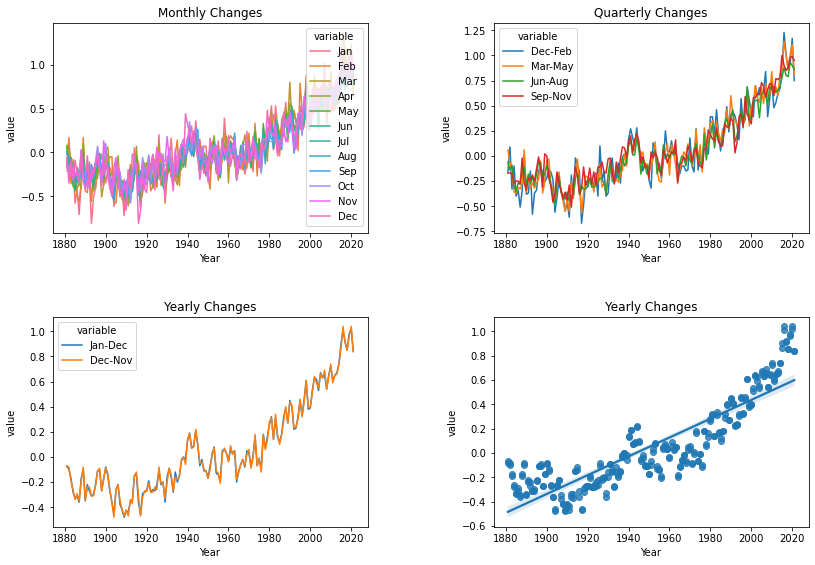

In [9]:
figure, axis = plt.subplots(2, 2, figsize=(15,10))
plt.subplots_adjust(left=0.2,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.lineplot(ax=axis[0,0], data=df_GLB.iloc[: , 0:13].replace('nan', float('nan')).melt(id_vars=['Year']),
             x='Year', y='value', hue='variable').set_title('Monthly Changes');
#
df_ses = df_GLB.iloc[: , 15:]
df_ses['Year']= df_GLB['Year']
sns.lineplot(ax=axis[0,1], data=df_ses.replace('nan', float('nan')).melt(id_vars=['Year']),
             x='Year', y='value', hue='variable').set_title('Quarterly Changes');

# 
df_year = df_GLB.iloc[: , 13:15]
df_year['Year']= df_GLB['Year']
sns.lineplot(ax=axis[1,0], data=df_year.replace('nan', float('nan')).melt(id_vars=['Year']),
             x='Year', y='value', hue='variable').set_title('Yearly Changes');

sns.regplot(ax=axis[1,1], data=df_year.replace('nan', float('nan')).melt(id_vars=['Year']),
             x='Year', y='value').set_title('Yearly Changes');

# figure.delaxes(axis[1,1])  # to delet a subplot


## The average temperature of the Earth’s surface is now about 1.1°C warmer than it was in the late 1900s (before the industrial revolution) and warmer than at any time in the last 100,000 years. The last decade (2011-2020) was the warmest on record, and each of the last four decades has been warmer than any previous decade since 1880.

## According to above time-series plot which showing variations in global temperature from 1880 to 2022.
### Since the 1970, temperature anomalies have consistently been positive. This indicating that the Earth has been warmer than the privious period. Since then, within a periods  50 years, the temperature anomaly has risen by  <font color=blue> one degree Celsius </font>, a clear evidence of global warming.

# <font color=blue> Now, from above we can confirm that global warming is real, so the next step what causes it and who  are responsible about these changes. This what will be classified in the second part and will concentrate with the last 70 years i.e. since 1950:</font>

</b>====================================================================================================


# <font color=red>   PART TWO </font>

* # <font color=blue> What Causes Global Warming? and Which countries should be most responsible about these changes?</font>

# 2.1 Step 1 : Importing Dataset
The first step of any data analysis is to import the required data set. In python, this can be done by simply reading the dataset which is available in a 'csv' format. This can be done by using read_csv function in the pandas library. The code is shown below:
###  We import our dataset, (<font color=blue>"owid-co2-data.csv"</font>), which is in csv format using the pd.read_csv() method of Pandas. After that we check the first 5 rows of our DataFrame.

In [10]:
# import the necessary liberaries

# Read Data and print the first 5 rows

df = pd.read_csv('owid-co2-data.csv')      

# Check the structure and  display the first 5 rows
df.head() 

country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3769828.0  NaN         NaN   
2  Afghanistan  1852      AFG   3787706.0  NaN         NaN   
3  Afghanistan  1853      AFG   3806634.0  NaN         NaN   
4  Afghanistan  1854      AFG   3825655.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_cumulative_other_co2  share_global_flaring_co2  \
0                                NaN                       NaN   
1                                NaN                       NaN   
2                                NaN                       NaN   
3                                NaN                       NaN   
4                                NaN                       NaN   

   share_global_gas_co2  share_global_luc_co2  share_global_oil_co2  \
0                   NaN                 0.121                   NaN   
1                   NaN                 0.118                   NaN   
2                   NaN                 0.116                   NaN   
3                   NaN                 0.115                   NaN   
4                   NaN                 0.114                   NaN   

   share_global_other_co2  total_ghg  total_ghg_excluding_lucf  trade_co2  \
0                     NaN        NaN                       NaN        NaN   
1                     NaN        NaN                       NaN        NaN   
2                     NaN        NaN                       NaN        NaN   
3                     NaN        NaN                       NaN        NaN   
4                     NaN        NaN                       NaN        NaN   

   trade_co2_share  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  

[5 rows x 74 columns]

## About the Data
### The data consist of various emission indicators around the world from 1850 to 2021. This analysis focuses on 1970 to 2021. This analysis will focus on Co2 emission in addition to its sources, espically Fossil Fuels .

In [11]:
# look at the shape of the original data
print('The data has', df.shape[0], 'rows and', df.shape[1], 'columns')  
# To check duplicated values:
df.duplicated(). sum()
#
# df.columns
print ('Data from ',df['year'].min(), '  to  ', df['year'].max(),' ==> Shape: the data has', df.shape[0], 'rows and', df.shape[1], 'columns')


The data has 46523 rows and 74 columns
Data from  1750   to   2021  ==> Shape: the data has 46523 rows and 74 columns


# Data Cleaning

In [12]:
print(df.isnull().sum(). sum() ) #.value_counts()

df.info()

1949361
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_

As we see the dataset has 74 columns and 46523 rows (or 'entries') but there are some missing values (NaN). Moreover, to know the dimension of the dataset matrix, we can also simply use shape function as shown below. 

In [14]:
df.shape

(46523, 74)

In [15]:
dff = df.copy()

df = df.drop('iso_code', axis=1)
dff

country  year iso_code  population           gdp  cement_co2  \
0      Afghanistan  1850      AFG   3752993.0           NaN         NaN   
1      Afghanistan  1851      AFG   3769828.0           NaN         NaN   
2      Afghanistan  1852      AFG   3787706.0           NaN         NaN   
3      Afghanistan  1853      AFG   3806634.0           NaN         NaN   
4      Afghanistan  1854      AFG   3825655.0           NaN         NaN   
...            ...   ...      ...         ...           ...         ...   
46518     Zimbabwe  2017      ZWE  14751101.0  2.194784e+10       0.469   
46519     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10       0.558   
46520     Zimbabwe  2019      ZWE  15354606.0           NaN       0.570   
46521     Zimbabwe  2020      ZWE  15669663.0           NaN       0.570   
46522     Zimbabwe  2021      ZWE  15993525.0           NaN       0.570   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_prct  ...  \
0                        NaN     NaN             NaN              NaN  ...   
1                        NaN     NaN             NaN              NaN  ...   
2                        NaN     NaN             NaN              NaN  ...   
3                        NaN     NaN             NaN              NaN  ...   
4                        NaN     NaN             NaN              NaN  ...   
...                      ...     ...             ...              ...  ...   
46518                  0.032   9.596          -0.937           -8.899  ...   
46519                  0.037  11.795           2.199           22.920  ...   
46520                  0.037  11.115          -0.681           -5.772  ...   
46521                  0.036  10.608          -0.507           -4.559  ...   
46522                  0.036  11.296           0.688            6.488  ...   

       share_global_cumulative_other_co2  share_global_flaring_co2  \
0                                    NaN                       NaN   
1                                    NaN                       NaN   
2                                    NaN                       NaN   
3                                    NaN                       NaN   
4                                    NaN                       NaN   
...                                  ...                       ...   
46518                                NaN                       0.0   
46519                                NaN                       0.0   
46520                                NaN                       0.0   
46521                                NaN                       0.0   
46522                                NaN                       0.0   

       share_global_gas_co2  share_global_luc_co2  share_global_oil_co2  \
0                       NaN                 0.121                   NaN   
1                       NaN                 0.118                   NaN   
2                       NaN                 0.116                   NaN   
3                       NaN                 0.115                   NaN   
4                       NaN                 0.114                   NaN   
...                     ...                   ...                   ...   
46518                   0.0                 0.219                 0.026   
46519                   0.0                 0.211                 0.033   
46520                   0.0                 0.183                 0.030   
46521                   0.0                 0.194                 0.030   
46522                   0.0                 0.190                 0.030   

       share_global_other_co2  total_ghg  total_ghg_excluding_lucf  trade_co2  \
0                         NaN        NaN                       NaN        NaN   
1                         NaN        NaN                       NaN        NaN   
2                         NaN        NaN                       NaN        NaN   
3                         NaN        NaN                       NaN        NaN   
4                         

Since the info function on our dataset showed that we have a lot of missing data in the dataset, we need to clean the dataset by removing these missing values.  There are a defferent methods to overcome these null values, depending on the nature of data and what we want to do with the data. These methodes may be one of the following:

1) Removing the missing or null values, but this will reduced the numbr of dataset, and may be not accepted in our data. <br> 
2) Dropping or removing rest of the null values, but after removing the columns, that contains more than 50 % null values. Of cours, this procedure will be reduced the number of variables, as we will show below, but maybe prevent losting a lot of data, and keep a minimum of relevant observations when working with the dataset. <br> 
3) Replacing the missing values by a constant value or by the mean or average value for each column, and this depend on the nature of the data measurments. <br> 
4) Replacing the missing or null values by (0). This method although keept all the data, it might cause a misunderstand, espicailly, when we want to calculate the mean or average of some columns. To overcome about this problem, one can  calculate, if necessary, the mean of desired columns for the values greater than (0). <br> 

As a consequence, I decided to use the scound choice, as I will show in next step. <br> 

<font color=blue> Note: </font> The 4^{th} choice to keep all variables,  with the scound choice maybe I will use them in another analyses for this data. <br> 


In this project, I will be showing two of many different strategies to complete dataset.
Strategy 1:
Lets start with finding out the columns with a large number of missing values. For this, let us consider only the columns with at least 50% of non-null rows.

In [16]:
# we need to remove the other columns with less than 50% of non-null rows, we use the 'drop' function
# we assign the resulting dataframe to a new dataframe name 'data_dropcol'
data_dropcol = df.drop(df.columns[df.notnull().mean() < 0.5], axis = 1)
dff_dropcol = dff.drop(dff.columns[dff.notnull().mean() < 0.5], axis = 1)

#In order to see the shape of this resulting dataframe, we use the 'shape' function on : 
print (data_dropcol.shape)

(46523, 40)


Now, if we see again the information about this new data_dropcol dataframe (by using the info function), we can see that we still have null values. So, in order to remove these null values, we can use dropna() function on data_dropcol.

In [17]:
# Removing the null values from the dataset by using 
data_dropcol.dropna(inplace=True)
dff_dropcol.dropna(inplace=True)

data_dropcol.head()
dff_dropcol

country  year iso_code  population  cement_co2     co2  \
100    Afghanistan  1950      AFG   7480464.0       0.000   0.084   
101    Afghanistan  1951      AFG   7571542.0       0.000   0.092   
102    Afghanistan  1952      AFG   7667534.0       0.000   0.092   
103    Afghanistan  1953      AFG   7764549.0       0.000   0.106   
104    Afghanistan  1954      AFG   7864289.0       0.000   0.106   
...            ...   ...      ...         ...         ...     ...   
46518     Zimbabwe  2017      ZWE  14751101.0       0.469   9.596   
46519     Zimbabwe  2018      ZWE  15052191.0       0.558  11.795   
46520     Zimbabwe  2019      ZWE  15354606.0       0.570  11.115   
46521     Zimbabwe  2020      ZWE  15669663.0       0.570  10.608   
46522     Zimbabwe  2021      ZWE  15993525.0       0.570  11.296   

       co2_growth_abs  co2_growth_prct  co2_including_luc  \
100             0.070          475.000              8.585   
101             0.007            8.696              9.142   
102             0.000            0.000              9.948   
103             0.015           16.000             10.915   
104             0.000            0.000             11.684   
...               ...              ...                ...   
46518          -0.937           -8.899             19.086   
46519           2.199           22.920             20.626   
46520          -0.681           -5.772             19.432   
46521          -0.507           -4.559             18.485   
46522           0.688            6.488             18.771   

       co2_including_luc_growth_abs  ...  share_global_co2  \
100                           0.546  ...             0.001   
101                           0.557  ...             0.001   
102                           0.806  ...             0.001   
103                           0.967  ...             0.002   
104                           0.769  ...             0.002   
...                             ...  ...               ...   
46518                        -1.817  ...             0.027   
46519                         1.540  ...             0.032   
46520                        -1.194  ...             0.030   
46521                        -0.946  ...             0.030   
46522                         0.285  ...             0.030   

       share_global_co2_including_luc  share_global_coal_co2  \
100                             0.075                  0.001   
101                             0.076                  0.001   
102                             0.082                  0.001   
103                             0.087                  0.001   
104                             0.091                  0.001   
...                               ...                    ...   
46518                           0.047                  0.041   
46519                           0.050                  0.049   
46520                           0.047                  0.047   
46521                           0.047                  0.047   
46522                           0.046                  0.048   

       share_global_cumulative_co2  share_global_cumulative_co2_including_luc  \
100                          0.000                                      0.003   
101                          0.000                                      0.004   
102                          0.000                                      0.006   
103                          0.000                                      0.007   
104                          0.000                                      0.009   
...                            ...                                        ...   
46518                        0.047                                      0.129   
46519                        0.047                                      0.127   
46520                        0.047                                      0.126   
46521                        0.046                                      0.125   
46522                        0.046          

This indicates that we have lost 33 columns and 30521 rows of data after the cleaning of the original dataset. We lose a lot of data for sure, but we cannot fill up the missing data with some other method (to the best of my knowledge in our data).

## Strategy 2:
For this strategy, we directly use the dropna() function on the original dataset.

In [18]:
#Removing the rows with even with one null cell and assigning this new dataframe to 'df_nona

data_nonull = df.dropna()
dff_nonull = dff.dropna()

data_nonull['gdp_per_capita'] = data_nonull['gdp']/data_nonull['population']


#Investigating the shape of 'df_nona'

#data_nonull.shape
data_nonull = data_nonull[data_nonull['year'] >= 1950]
dff_nonull = dff_nonull[dff_nonull['year'] >= 1950]
data_nonull.shape
data_nonull.head()

country  year  population           gdp  cement_co2  \
3513  Australia  1990  17048002.0  4.641366e+11       3.463   
3514  Australia  1991  17271092.0  4.610038e+11       3.183   
3515  Australia  1992  17462500.0  4.778432e+11       2.923   
3516  Australia  1993  17631514.0  5.008406e+11       3.005   
3517  Australia  1994  17805506.0  5.273462e+11       3.484   

      cement_co2_per_capita      co2  co2_growth_abs  co2_growth_prct  \
3513                  0.203  278.154           0.667            0.240   
3514                  0.184  279.529           1.374            0.494   
3515                  0.167  284.525           4.997            1.788   
3516                  0.170  288.871           4.345            1.527   
3517                  0.196  293.697           4.826            1.671   

      co2_including_luc  ...  share_global_flaring_co2  share_global_gas_co2  \
3513            263.388  ...                     2.715                 0.899   
3514            230.871  ...                     2.474                 0.839   
3515            310.760  ...                     2.916                 0.858   
3516            331.190  ...                     2.924                 0.877   
3517            315.168  ...                     2.774                 0.903   

      share_global_luc_co2  share_global_oil_co2  share_global_other_co2  \
3513                -0.303                 0.961                   0.998   
3514                -1.023                 0.908                   1.028   
3515                 0.536                 0.953                   1.086   
3516                 0.868                 0.979                   1.189   
3517                 0.405                 0.992                   1.385   

      total_ghg  total_ghg_excluding_lucf  trade_co2  trade_co2_share  \
3513     541.39                    487.00    -34.986          -12.578   
3514     541.38                    486.99    -35.681          -12.765   
3515     542.04                    487.65    -38.076          -13.382   
3516     544.20                    489.81    -41.467          -14.355   
3517     550.17                    495.78    -37.908          -12.907   

      gdp_per_capita  
3513    27225.278458  
3514    26692.221717  
3515    27363.964302  
3516    28405.989154  
3517    29617.028121  

[5 rows x 74 columns]

As shown above, by using dropna() function directly on the original dataset, we lose 45289 rows of data which is more than that of what we achieved in Strategy 1. However, with this strategy we are able to retain all the columns (74). The choice of either of the strategies depends on the objectives of the user. For this project, we will be using Strategy 1 and moving forward with the analysis.

# Step 3: Analyzing the Cleaned Data



### In our analyses, maybe some step has to be taken before descriptive statistics and exploratory data analysis, such as:

1) Concentrate on the neccessary variables which helpe us to investigating the distribution of Co2 emission around the world. but we will keep with all  <br>
2) Dealing with misssing values (Strategy 1).<br>
3) Select the important time frame (if we want to concentrate on a spicefic peirod).<br>
4) Create a new column for GDP per Capita.<br>
5) Create a seperate dataset for world in the dataset.<br>
5) Create a seperate dataset for the continents in the dataset.<br>
6) Create a seperate dataset for the countries in the dataset.

### Select the important time frame (1950 -2021)

In [19]:
data_dropcol.columns

Index(['country', 'year', 'population', 'cement_co2', 'co2', 'co2_growth_abs',
       'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'flaring_co2', 'flaring_co2_per_capita',
       'gas_co2', 'gas_co2_per_capita', 'land_use_change_co2',
       'land_use_change_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'share_global_co2', 'share_global_co2_including_luc',
       'share_global_coal_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_co2_including_luc',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_luc_co2',
       'share_global_cumulative_oil_co2', 'share_global_luc_

In [21]:
data_co2 = data_dropcol[data_dropcol['year'] >= 1950]
dff_co2 = dff_dropcol[dff_dropcol['year'] >= 1950]

# # Create a new column for GDP per Capita.
#data_co2['gdp_per_capita'] = data_co2['gdp']/data_co2['population']
data_co2.head()
dff_co2

country  year iso_code  population  cement_co2     co2  \
100    Afghanistan  1950      AFG   7480464.0       0.000   0.084   
101    Afghanistan  1951      AFG   7571542.0       0.000   0.092   
102    Afghanistan  1952      AFG   7667534.0       0.000   0.092   
103    Afghanistan  1953      AFG   7764549.0       0.000   0.106   
104    Afghanistan  1954      AFG   7864289.0       0.000   0.106   
...            ...   ...      ...         ...         ...     ...   
46518     Zimbabwe  2017      ZWE  14751101.0       0.469   9.596   
46519     Zimbabwe  2018      ZWE  15052191.0       0.558  11.795   
46520     Zimbabwe  2019      ZWE  15354606.0       0.570  11.115   
46521     Zimbabwe  2020      ZWE  15669663.0       0.570  10.608   
46522     Zimbabwe  2021      ZWE  15993525.0       0.570  11.296   

       co2_growth_abs  co2_growth_prct  co2_including_luc  \
100             0.070          475.000              8.585   
101             0.007            8.696              9.142   
102             0.000            0.000              9.948   
103             0.015           16.000             10.915   
104             0.000            0.000             11.684   
...               ...              ...                ...   
46518          -0.937           -8.899             19.086   
46519           2.199           22.920             20.626   
46520          -0.681           -5.772             19.432   
46521          -0.507           -4.559             18.485   
46522           0.688            6.488             18.771   

       co2_including_luc_growth_abs  ...  share_global_co2  \
100                           0.546  ...             0.001   
101                           0.557  ...             0.001   
102                           0.806  ...             0.001   
103                           0.967  ...             0.002   
104                           0.769  ...             0.002   
...                             ...  ...               ...   
46518                        -1.817  ...             0.027   
46519                         1.540  ...             0.032   
46520                        -1.194  ...             0.030   
46521                        -0.946  ...             0.030   
46522                         0.285  ...             0.030   

       share_global_co2_including_luc  share_global_coal_co2  \
100                             0.075                  0.001   
101                             0.076                  0.001   
102                             0.082                  0.001   
103                             0.087                  0.001   
104                             0.091                  0.001   
...                               ...                    ...   
46518                           0.047                  0.041   
46519                           0.050                  0.049   
46520                           0.047                  0.047   
46521                           0.047                  0.047   
46522                           0.046                  0.048   

       share_global_cumulative_co2  share_global_cumulative_co2_including_luc  \
100                          0.000                                      0.003   
101                          0.000                                      0.004   
102                          0.000                                      0.006   
103                          0.000                                      0.007   
104                          0.000                                      0.009   
...                            ...                                        ...   
46518                        0.047                                      0.129   
46519                        0.047                                      0.127   
46520                        0.047                                      0.126   
46521                        0.046                                      0.125   
46522                        0.046          

In [22]:
data_co2.shape
data_co2.isna().sum().sum()

0

In [23]:
print (data_co2['year'].max(), ' - ', data_co2['year'].min(), '= ', data_co2['year'].max()- data_co2['year'].min(),\
       '    ==> Shape  ', data_co2.shape )


2021  -  1950 =  71     ==> Shape   (14312, 40)


# 2. Exploratory Data Analysis


##   A. Variations the Co2 Emissions Around the World from 1950 to 2021

In [24]:
data_co2_world = data_co2[data_co2['country']=='World']
data_co2_world.head()


country  year    population  cement_co2       co2  co2_growth_abs  \
45935   World  1950  2.499322e+09      66.979  6003.272         757.423   
45936   World  1951  2.543130e+09      75.839  6379.796         376.524   
45937   World  1952  2.590271e+09      80.841  6465.727          85.930   
45938   World  1953  2.640279e+09      89.628  6647.763         182.036   
45939   World  1954  2.691979e+09      97.231  6789.969         142.206   

       co2_growth_prct  co2_including_luc  co2_including_luc_growth_abs  \
45935           14.439          11428.435                      1181.348   
45936            6.272          11978.877                       550.442   
45937            1.347          12190.116                       211.239   
45938            2.815          12479.874                       289.758   
45939            2.139          12793.678                       313.804   

       co2_including_luc_growth_prct  ...  share_global_co2  \
45935                         11.529  ...             100.0   
45936                          4.816  ...             100.0   
45937                          1.763  ...             100.0   
45938                          2.377  ...             100.0   
45939                          2.514  ...             100.0   

       share_global_co2_including_luc  share_global_coal_co2  \
45935                           100.0                  100.0   
45936                           100.0                  100.0   
45937                           100.0                  100.0   
45938                           100.0                  100.0   
45939                           100.0                  100.0   

       share_global_cumulative_co2  share_global_cumulative_co2_including_luc  \
45935                        100.0                                      100.0   
45936                        100.0                                      100.0   
45937                        100.0                                      100.0   
45938                        100.0                                      100.0   
45939                        100.0                                      100.0   

       share_global_cumulative_coal_co2  share_global_cumulative_luc_co2  \
45935                             100.0                            100.0   
45936                             100.0                            100.0   
45937                             100.0                            100.0   
45938                             100.0                            100.0   
45939                             100.0                            100.0   

       share_global_cumulative_oil_co2  share_global_luc_co2  \
45935                            100.0                 100.0   
45936                            100.0                 100.0   
45937                            100.0                 100.0   
45938                            100.0                 100.0   
45939                            100.0                 100.0   

       share_global_oil_co2  
45935                 100.0  
45936                 100.0  
45937                 100.0  
45938                 100.0  
45939                 100.0  

[5 rows x 40 columns]

In [25]:
print (data_co2_world['year'].max(), ' - ', data_co2_world['year'].min(),'  ==> Shape  ', data_co2_world.shape )
data_co2.columns

2021  -  1950   ==> Shape   (72, 40)


Index(['country', 'year', 'population', 'cement_co2', 'co2', 'co2_growth_abs',
       'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'flaring_co2', 'flaring_co2_per_capita',
       'gas_co2', 'gas_co2_per_capita', 'land_use_change_co2',
       'land_use_change_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'share_global_co2', 'share_global_co2_including_luc',
       'share_global_coal_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_co2_including_luc',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_luc_co2',
       'share_global_cumulative_oil_co2', 'share_global_luc_

In [26]:

fig = px.scatter(data_co2_world, x ='year', y='co2', title="Global CO2 emissions between 1950 and 2021", color ='co2') 
#fig = px.line(data, x ='year', y='co2')

fig.show()

We can see that a significant rise in co2 emissions around the world; since from 1950, Co2 emissions have been increased more than 5 times untill 2000 and 7 times untill 2019. This means emission co2 around the world in continuous increasing. It is worthwhile, Emissions shrank by more than 5% in 2020, as the Covid-19  "CORONA"  pandemic cut energy demand. In 2021, emissions rebounded past pre-pandemic levels, growing more than 6% in tandem with economic stimulus and the roll-out of vaccines. 

Of course there are many sources produced co2, but hiere we will concentrate on the main sources such as , Coal, Oil, Gas and cement. In the following figuer, we will show the changes of these sources contributions to producing co2 through years ago around the world:

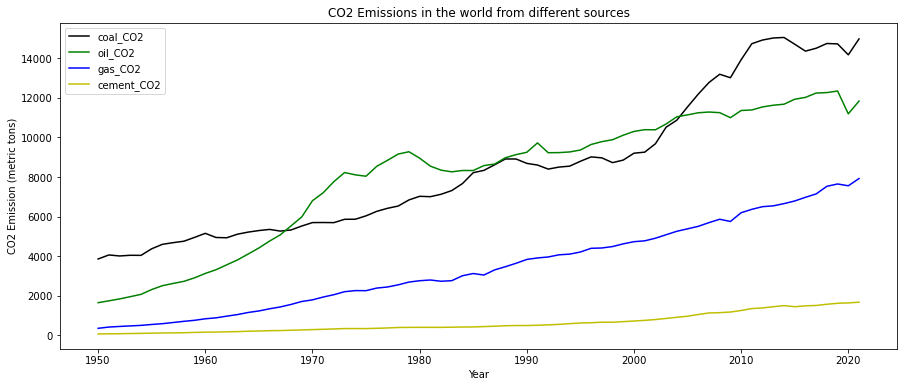

In [27]:
#contributions the main sources such as , Coal, Oil, Gas and cement in producing co2. 
plt.figure(figsize=(15, 6))
#
plt.plot(data_co2_world.year, data_co2_world.coal_co2,  color='k', label='coal_CO2')
plt.plot(data_co2_world.year, data_co2_world.oil_co2,  color='g', label='oil_CO2')
plt.plot(data_co2_world.year, data_co2_world.gas_co2,  color='b', label='gas_CO2')
plt.plot(data_co2_world.year, data_co2_world.cement_co2,  color='y', label='cement_CO2')
##
plt.xlabel('Year')
plt.ylabel('CO2 Emission (metric tons)')
plt.title('CO2 Emissions in the world from different sources')
#
plt.legend()
plt.show()

you can see Fossil Fuels, i.e., Coal, Oil, and Gas, are the main sources for Co2 Emission around the world. Until the early 20 century, coal was the predominant source of fuel and the only contributor to global CO2 emissions. Around the mid-20 century, Oil and Gas emerged as alternative Fuels. Consumption of these alternative Fuels released more CO2, accelerating the increase in global emissions. <font color=blue> One can see also, the rate of increasing CO2 emissions, in the above figuere, was much steeper from the 1950s onwards, after oil and natural gas emerged as alternative fuels </font>.

##   B. Co2 Emissions from Continents of the World from 1950 to 2021

In [28]:
# Creat a new data frame contains on the continent
continent = ['Europe', 'Africa', 'North America', 'South America', 'Antartica', 'Australia','Asia', 'Oceania']

data_co2_continent= data_co2.loc[data_co2.country.isin(continent)]  
dff_co2_continent= dff_co2.loc[dff_co2.country.isin(continent)]  
data_co2_continent 

data_co2_continent['country'].unique()
data_co2_continent
data_co2_continent['country']. unique() 

array(['Africa', 'Asia', 'Australia', 'Europe', 'North America',
       'Oceania', 'South America'], dtype=object)

In [29]:
# plot Co2 Emissions from Continents of the World from 1950 to 2021
line = px.line(data_co2_continent, 'year', 'co2', color='country', log_y=True,
               title='The Trend of Co2 Emission in Each Continent Over the Years')
line.update_yaxes(showgrid=True, showline=True)
line.update_xaxes(showgrid=False, showline=True)
line.update_layout(margin=dict(t=90, b=0, l=80, r=50),
                   hovermode='closest',
                  xaxis_title=' Year ', yaxis_title='Co2 Emision',
                  legend = dict(orientation='h', yanchor='auto', y=1, xanchor='right', x=1, title='Continents'))


The overall trend in carbon dioxide emissions around the world is slightly upward. Since 1980, many of the world's continents have a nearly  steady rate of increase in carbon dioxide emissions except for Asia whose carbon dioxide emission levels have followed an upward trend. In the 21st century only Europe and North America, which have had a slight downward trend.

* # Co2 Emissions from different Sources according to Continents from (1950 - 2021)

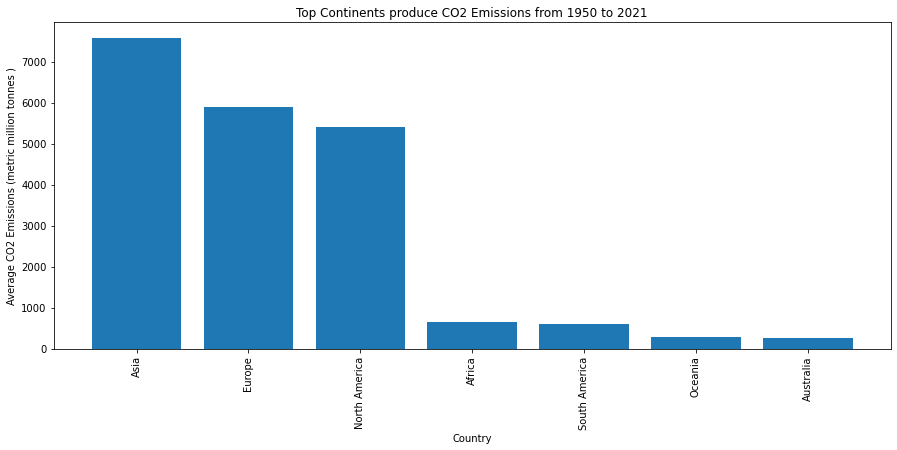

In [30]:
# Group the data by Continents and calculate the average CO2 emissions
#
avg_co2_by_continent = data_co2_continent.groupby('country')['co2'].mean().sort_values(ascending=False)
#
# Plot a bar chart of the top Continents with the highest average CO2 emissions
plt.figure(figsize=(15, 6))
#
plt.bar(avg_co2_by_continent.head(10).index, avg_co2_by_continent.head(10))
#
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric million tonnes )')
#
plt.title('Top Continents produce CO2 Emissions from 1950 to 2021')
plt.show()

Asia, Europe, and North America are most responsible about co2 emissions. 

In [31]:

px.pie(avg_co2_by_continent, names=avg_co2_by_continent.index, values ='co2', hole=0.5, title ='Co2 Emissions from 1950 to 2021')


Asia, Europe, and North America emit more than 90% from co2 emission of the world. But Population may play a main rule in this ratio. so when we plot the pi chart for co2 per person in each continent, the ratio is complitly defferent and you can see the richst continents are more produce a large amount from co2,  due to industry and abundance  oil and natural gas.


In [32]:
#avg_co2_by_continent_per_capita = data_co2_continent.loc[data_co2_continent['co2_per_capita'] > 0]. groupby('country').agg({'co2_per_capita': 'mean'}).sort_values('co2_per_capita', ascending=False)

avg_co2_by_continent_per_capita = data_co2_continent.groupby('country')['co2_per_capita'].mean().sort_values(ascending=False)

px.pie(avg_co2_by_continent_per_capita, names=avg_co2_by_continent_per_capita.index, values ='co2_per_capita', hole=0.5, title ='Co2 Emissions per capita from 1900 to 2021')


It can be seen that using this measure, Co2 per capita is higher in Australia than any other continent of the world. Asia becomes the continent with the third lowest emission level after Africa and South America.

In [33]:
px.pie(avg_co2_by_continent_per_capita, names=avg_co2_by_continent_per_capita.index \
       , values='co2_per_capita',  hole=0.5,title ='Co2 Emissions in 2018')

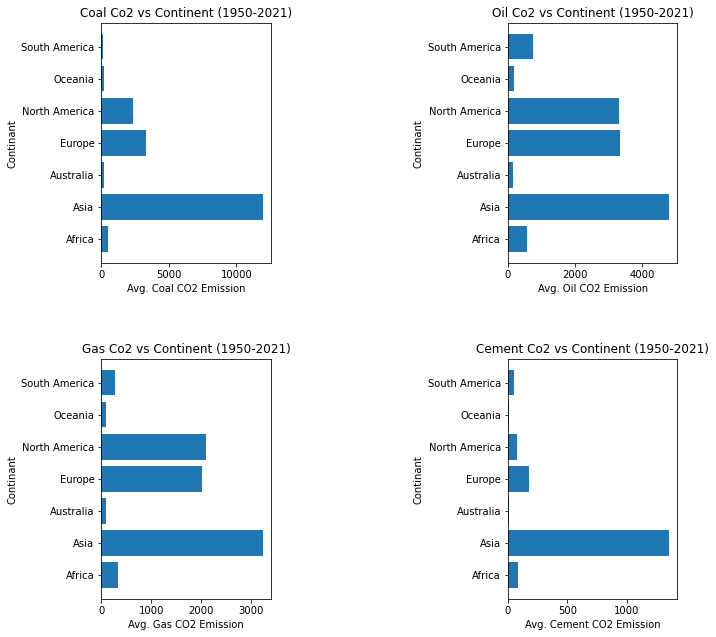

In [34]:
figure, axis = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.4,
                    hspace=0.4)
plt.subplot(2,2,1),
plt.barh(data_co2_continent['country'], data_co2_continent['coal_co2'])
plt.ylabel('Continant')
plt.xlabel('Avg. Coal CO2 Emission')
plt.title("Coal Co2 vs Continent (1950-2021)")

plt.subplot(2,2,2),
plt.barh(data_co2_continent['country'], data_co2_continent['oil_co2'])
plt.ylabel('Continant')
plt.xlabel('Avg. Oil CO2 Emission')
plt.title("Oil Co2 vs Continent (1950-2021)")

plt.subplot(2,2,3),
plt.barh(data_co2_continent['country'], data_co2_continent['gas_co2'])

plt.ylabel('Continant')
plt.xlabel('Avg. Gas CO2 Emission')
plt.title("Gas Co2 vs Continent (1950-2021)")

plt.subplot(2,2,4),
plt.barh(data_co2_continent['country'], data_co2_continent['cement_co2'])

plt.ylabel('Continant')
plt.xlabel('Avg. Cement CO2 Emission')
plt.title("Cement Co2 vs Continent (1950-2021)")
#
plt.show()

##   C. Co2 Emissions from Countries of the World from 1900 to 2021

In [35]:
# In this dataframe,some quick data cleaning, will remove regions so that we are only looking at individual countries 

list_other = ["Africa", "Asia", "Asia (excl. China & India)",'Australia',
               "EU-27", "EU-28", "Europe", "Europe (excl. EU-27)", "Europe (excl. EU-28)", "International transport", 
                "KP Annex B", "Non KP Annex B" , "Non-OECD", "North America", "North America (excl. USA)", "OECD", 
                 "Oceania", "Reunion", "South America", "World", 'Europe (GCP)', 'High-income countries', 
                 'OECD (GCP)', 'Non-OECD (GCP)', 'Upper-middle-income countries', 'Asia (GCP)', 'North America (GCP)',
              'European Union (28)', 'European Union (27) (GCP)', 'European Union (27)', 'Middle East (GCP)', 
              'Asia (excl. China and India)', 'Lower-middle-income countries', 'Kuwaiti Oil Fires (GCP)', 'Africa (GCP)', 
             'South America (GCP)', 'Oceania (GCP)', 'Low-income countries', 'Central America (GCP)' , 
             'French Equatorial Africa (GCP)', 'Turks and Caicos Islands', 'Saint Vincent and the Grenadines',
              'Sao Tome and Principe']  # , 'Sint Maarten (Dutch part)' ]


data_co2_country = data_co2[~data_co2['country'].isin(list_other)]
data_co2_country_nonull = data_nonull[~data_nonull['country'].isin(list_other)]
#
dff_co2_country = dff_co2[~dff_co2['country'].isin(list_other)]                # contains iso_code columns   
dff_co2_country_nonull = dff_nonull[~dff_nonull['country'].isin(list_other)]   # contains iso_code columns 


In [36]:
# Group the data by country and calculate the average CO2 emissions
top_co2_emissions = data_co2_country_nonull.groupby('country')['co2'].mean().sort_values(ascending=False)
#
# Group the data by country and calculate the average CO2 emissions per capita
top_co2_emissions_per_capita = data_co2_country_nonull.groupby('country')['co2_per_capita'].mean().sort_values(ascending=False)
#
# Group the data by country and calculate the average CO2 emissions per gdp
top_co2_emissions_per_gdp = data_co2_country_nonull.groupby('country')['co2_per_gdp'].mean().sort_values(ascending=False)


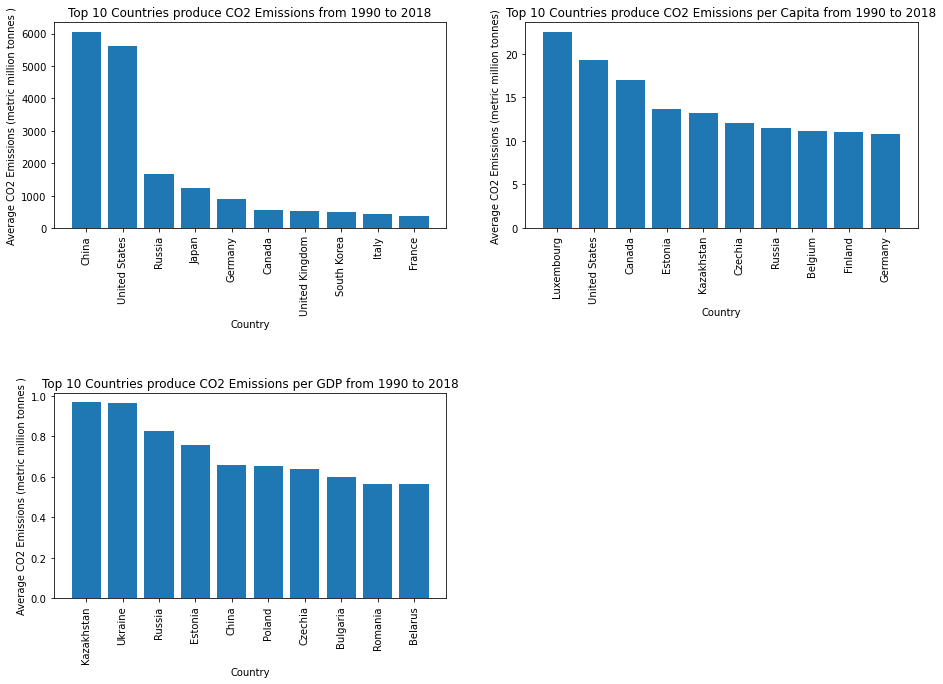

In [37]:
# Plot a bar chart of the top 10 countries with the highest average CO2 emissions
#
figure, axis = plt.subplots(2, 2, figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.8)

plt.subplot(2,2,1), 
# Plot a bar chart of the top 10 countries with the highest average CO2 emissions
plt.bar(top_co2_emissions.head(10).index, top_co2_emissions.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric million tonnes )')
plt.title('Top 10 Countries produce CO2 Emissions from 1990 to 2018')


# Plot a bar chart of the top 10 countries with the highest average CO2 emissions per capita
plt.subplot(2,2,2),
plt.bar(top_co2_emissions_per_capita.head(10).index, top_co2_emissions_per_capita.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric million tonnes)')
plt.title('Top 10 Countries produce CO2 Emissions per Capita from 1990 to 2018')

# Plot a bar chart of the top 10 countries with the highest average CO2 emissions per gdp
plt.subplot(2,2,3),
plt.bar(top_co2_emissions_per_gdp.head(10).index, top_co2_emissions_per_gdp.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric million tonnes )')
plt.title('Top 10 Countries produce CO2 Emissions per GDP from 1990 to 2018')

figure.delaxes(axis[1,1]) 

plt.show()

This bar distribution is quite diverse. But as we see, United State, China and Russia produce the most amount of Co2.

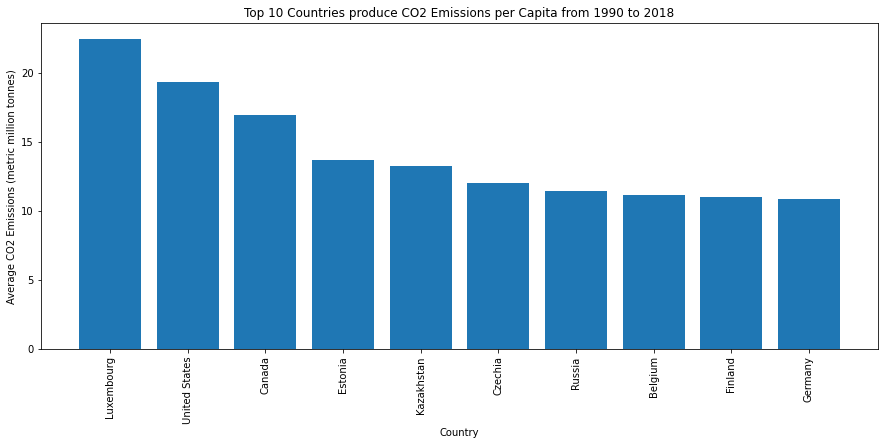

In [38]:

# Plot a bar chart of the top 10 countries with the highest average CO2 emissions per capita
plt.figure(figsize=(15, 6))
#
plt.bar(top_co2_emissions_per_capita.head(10).index, top_co2_emissions_per_capita.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric million tonnes)')
plt.title('Top 10 Countries produce CO2 Emissions per Capita from 1990 to 2018')
plt.show()


Sint Maarten(Deutch part) is ranked number 1 in the Caribbean for Carbon dioxide emissions 20 tones per person.
• In St. Maarten, almost ten kilos per person of daily waste is generated and discarded.
• Ten kilos of waste is more than the total per capita average of the other five Dutch Caribbean islands combined.

<br> https://aicesis.org/publications-docman/publications/130-social-economic-council-aicesis-presentation-climate-change/file <br>

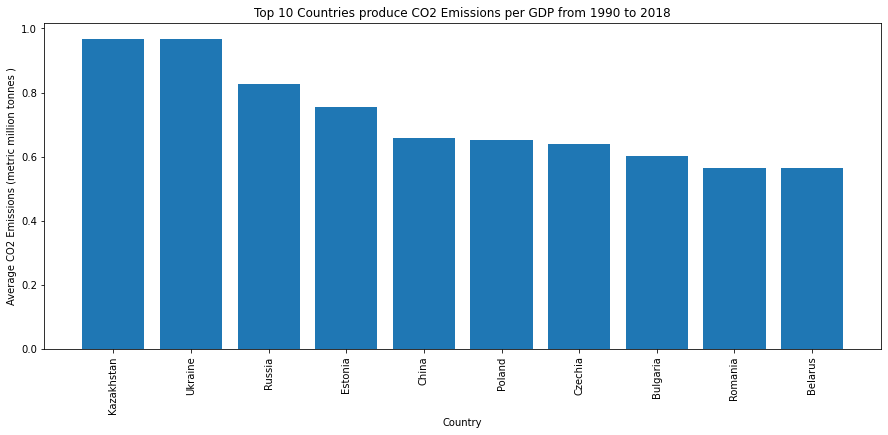

In [39]:
# Plot a bar chart of the top 10 countries with the highest average CO2 emissions per gdp
plt.figure(figsize=(15, 6))
#
plt.bar(top_co2_emissions_per_gdp.head(10).index, top_co2_emissions_per_gdp.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric million tonnes )')
plt.title('Top 10 Countries produce CO2 Emissions per GDP from 1990 to 2018')
plt.show()

In [40]:
data_co2_map =dff_co2_country[dff_co2_country['year']>2000]
data_co2_map

country  year iso_code  population  cement_co2     co2  \
151    Afghanistan  2001      AFG  19688634.0       0.007   1.069   
152    Afghanistan  2002      AFG  21000258.0       0.011   1.341   
153    Afghanistan  2003      AFG  22645136.0       0.010   1.560   
154    Afghanistan  2004      AFG  23553554.0       0.010   1.237   
155    Afghanistan  2005      AFG  24411196.0       0.006   1.890   
...            ...   ...      ...         ...         ...     ...   
46518     Zimbabwe  2017      ZWE  14751101.0       0.469   9.596   
46519     Zimbabwe  2018      ZWE  15052191.0       0.558  11.795   
46520     Zimbabwe  2019      ZWE  15354606.0       0.570  11.115   
46521     Zimbabwe  2020      ZWE  15669663.0       0.570  10.608   
46522     Zimbabwe  2021      ZWE  15993525.0       0.570  11.296   

       co2_growth_abs  co2_growth_prct  co2_including_luc  \
151             0.022            2.098              1.948   
152             0.272           25.432              9.475   
153             0.219           16.302              5.773   
154            -0.322          -20.669              3.692   
155             0.652           52.719              3.355   
...               ...              ...                ...   
46518          -0.937           -8.899             19.086   
46519           2.199           22.920             20.626   
46520          -0.681           -5.772             19.432   
46521          -0.507           -4.559             18.485   
46522           0.688            6.488             18.771   

       co2_including_luc_growth_abs  ...  share_global_co2  \
151                           1.085  ...             0.004   
152                           7.527  ...             0.005   
153                          -3.702  ...             0.006   
154                          -2.081  ...             0.004   
155                          -0.337  ...             0.006   
...                             ...  ...               ...   
46518                        -1.817  ...             0.027   
46519                         1.540  ...             0.032   
46520                        -1.194  ...             0.030   
46521                        -0.946  ...             0.030   
46522                         0.285  ...             0.030   

       share_global_co2_including_luc  share_global_coal_co2  \
151                             0.006                  0.001   
152                             0.030                  0.001   
153                             0.017                  0.001   
154                             0.011                  0.001   
155                             0.010                  0.001   
...                               ...                    ...   
46518                           0.047                  0.041   
46519                           0.050                  0.049   
46520                           0.047                  0.047   
46521                           0.047                  0.047   
46522                           0.046                  0.048   

       share_global_cumulative_co2  share_global_cumulative_co2_including_luc  \
151                          0.007                                      0.023   
152                          0.007                                      0.023   
153                          0.007                                      0.023   
154                          0.007                                      0.023   
155                          0.007                                      0.022   
...                            ...                                        ...   
46518                        0.047                                      0.129   
46519                        0.047                                      0.127   
46520                        0.047                                      0.126   
46521                        0.046                                      0.125   
46522                        0.046          

In [41]:
co2_map = px.choropleth(dff_co2_country, locations='iso_code', #determines the points on the map
                        color='co2', #the colour of the bubble
                        hover_name='country', #label to be hovered (tooltip)
                        title= 'The Distribution of Co2 Emission Around the World', #Map heading
                        color_continuous_scale='RdYlGn_r', #color scale
                        projection='natural earth')#projection
co2_map 

* # How did CO2 emissions change over time?

### The following interactive mape shows how changed co2 emissions by country and over time from 1900 to 2021. 

In [42]:
# using plotly Lib. and choroplet 
co2_dist = data_co2_country.sort_values (by= 'year')
#
fig = px.choropleth(co2_dist, locations='country', locationmode='country names',color = 'co2', animation_frame='year')
fig.show()

### In the following we will show the top countries according to the different sources of co2 emissions:

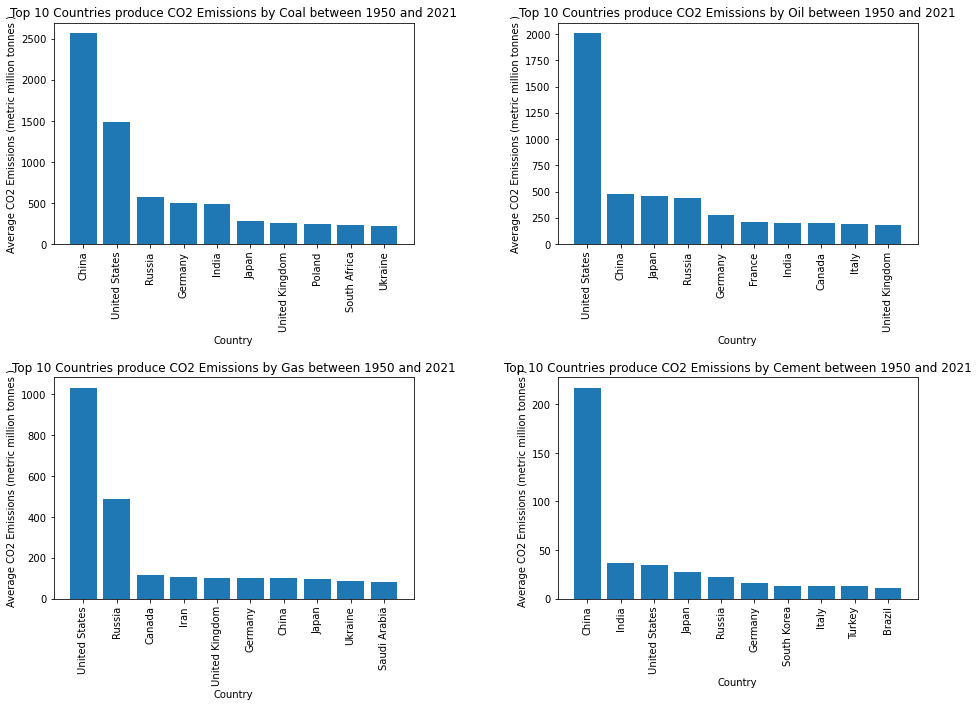

In [43]:
# Group the data by country and calculate the average CO2 emissions
avg_by_country_coal = data_co2_country.groupby('country')['coal_co2'].mean().sort_values(ascending=False)
avg_by_country_gas = data_co2_country.groupby('country')['gas_co2'].mean().sort_values(ascending=False)
avg_by_country_oil = data_co2_country.groupby('country')['oil_co2'].mean().sort_values(ascending=False)
avg_by_country_cement = data_co2_country.groupby('country')['cement_co2'].mean().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the highest average CO2 emissions produced from diffirent sources
#
figure, axis = plt.subplots(2, 2, figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.6)

plt.subplot(2,2,1), 
plt.bar(avg_by_country_coal.head(10).index, avg_by_country_coal.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric million tonnes )')
plt.title('Top 10 Countries produce CO2 Emissions by Coal between 1950 and 2021')

plt.subplot(2,2,2),
plt.bar(avg_by_country_oil.head(10).index, avg_by_country_oil.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric million tonnes )')
plt.title('Top 10 Countries produce CO2 Emissions by Oil between 1950 and 2021')

plt.subplot(2,2,3),
plt.bar(avg_by_country_gas.head(10).index, avg_by_country_gas.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric million tonnes )')
plt.title('Top 10 Countries produce CO2 Emissions by Gas between 1950 and 2021')


plt.subplot(2,2,4),
plt.bar(avg_by_country_cement.head(10).index, avg_by_country_cement.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric million tonnes )')
plt.title('Top 10 Countries produce CO2 Emissions by Cement between 1950 and 2021')
plt.show()

###  Coal is main sources of energy in China, while United state depends on different sources like Coal, Oil, and Gas in Energy.

* # <font color=blue> Countries With Highest Co2 Emissions(per Capita between 1950 and 2021)</font>

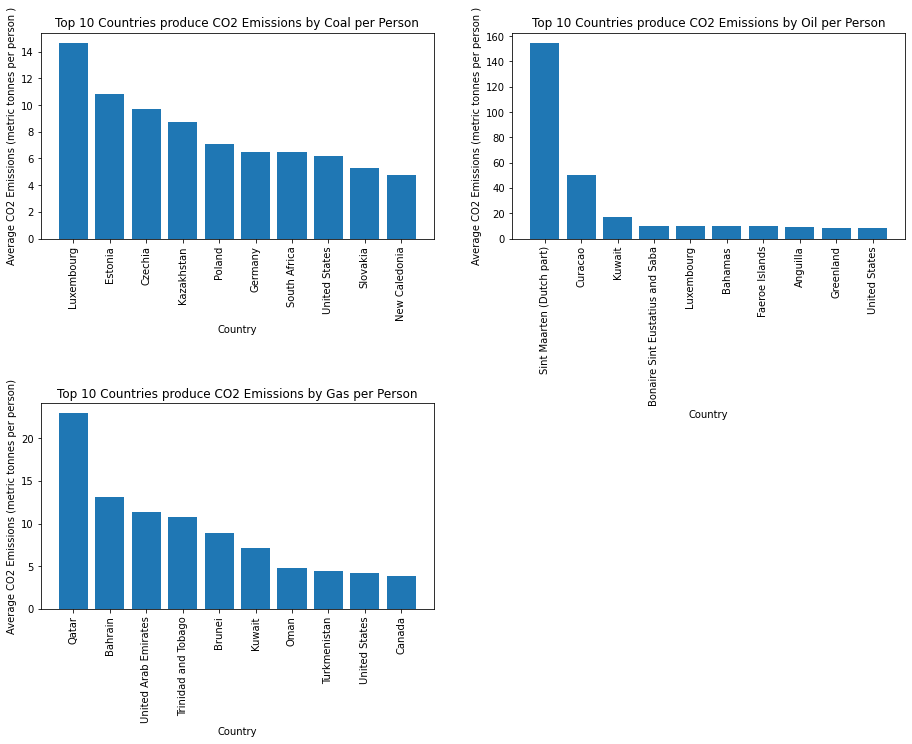

In [44]:
# Group the data by country and calculate the average CO2 emissions
#
avg_by_country_coal_per_capita = data_co2_country.groupby('country')['coal_co2_per_capita'].mean().sort_values(ascending=False)
avg_by_country_gas_per_capita = data_co2_country.groupby('country')['gas_co2_per_capita'].mean().sort_values(ascending=False)
avg_by_country_oil_per_capita = data_co2_country.groupby('country')['oil_co2_per_capita'].mean().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the highest average CO2 emissions
#
figure, axis = plt.subplots(2, 2, figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.8)

plt.subplot(2,2,1), 
plt.bar(avg_by_country_coal_per_capita.head(10).index, avg_by_country_coal_per_capita.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric tonnes per person )')
plt.title('Top 10 Countries produce CO2 Emissions by Coal per Person')

plt.subplot(2,2,2),
plt.bar(avg_by_country_oil_per_capita.head(10).index, avg_by_country_oil_per_capita.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric tonnes per person )')
plt.title('Top 10 Countries produce CO2 Emissions by Oil per Person')

plt.subplot(2,2,3),
plt.bar(avg_by_country_gas_per_capita.head(10).index, avg_by_country_gas_per_capita.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric tonnes per person)')
plt.title('Top 10 Countries produce CO2 Emissions by Gas per Person')

figure.delaxes(axis[1,1]) 

plt.show()

## The above figure shows the top 10 countries with the highest Co2 emission per capita according to differint sources. 

### The geographical distribution of these countries somewhat diverse. But as you can see that, Middle East countries produce the most amount of gas_ Co2 per capita and most of these countries are rich and low populated.

## The highst 10 countries according to consumption Energy and Income (gdp) per Person  between 1990 and 2018

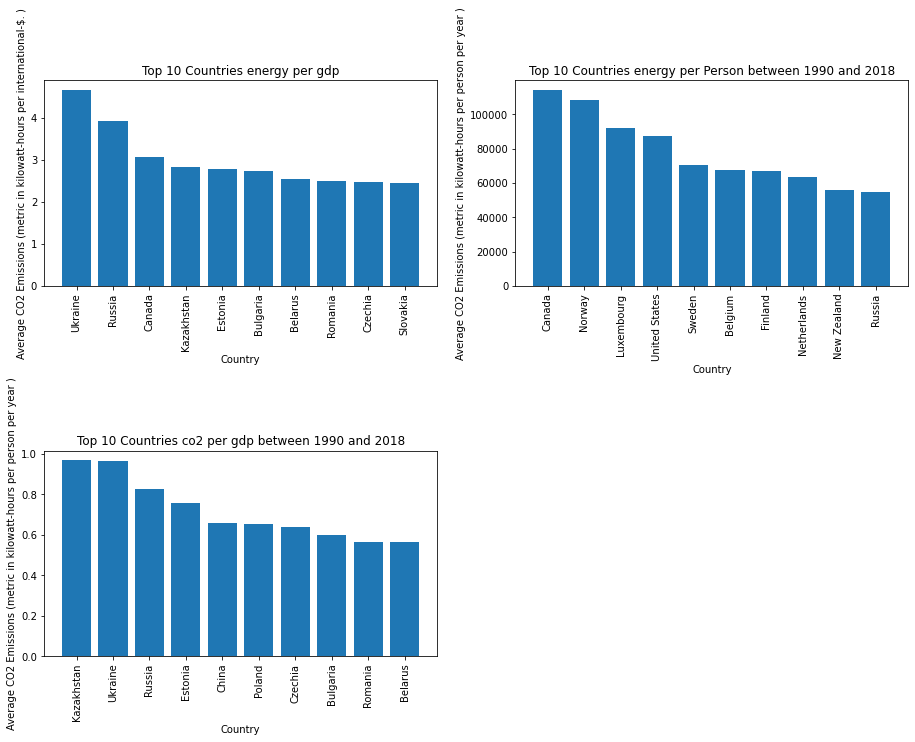

In [45]:
#
avg_by_country_energy_per_gdp = data_co2_country_nonull.groupby('country')['energy_per_gdp'].mean().sort_values(ascending=False)
avg_by_country_energy_per_capita = data_co2_country_nonull.groupby('country')['energy_per_capita'].mean().sort_values(ascending=False)
avg_by_country_co2_per_gdp = data_co2_country_nonull.groupby('country')['co2_per_gdp'].mean().sort_values(ascending=False)
# 
figure, axis = plt.subplots(2, 2, figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.8)

plt.subplot(2,2,1),

plt.bar(avg_by_country_energy_per_gdp.head(10).index, avg_by_country_energy_per_gdp.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric in kilowatt-hours per international-$. )')
plt.title('Top 10 Countries energy per gdp')

plt.subplot(2,2,2), 
plt.bar(avg_by_country_energy_per_capita.head(10).index, avg_by_country_energy_per_capita.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric in kilowatt-hours per person per year )')
plt.title('Top 10 Countries energy per Person between 1990 and 2018')

plt.subplot(2,2,3), 
plt.bar(avg_by_country_co2_per_gdp.head(10).index, avg_by_country_co2_per_gdp.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric in kilowatt-hours per person per year )')
plt.title('Top 10 Countries co2 per gdp between 1990 and 2018')

figure.delaxes(axis[1,1]) 


plt.show()

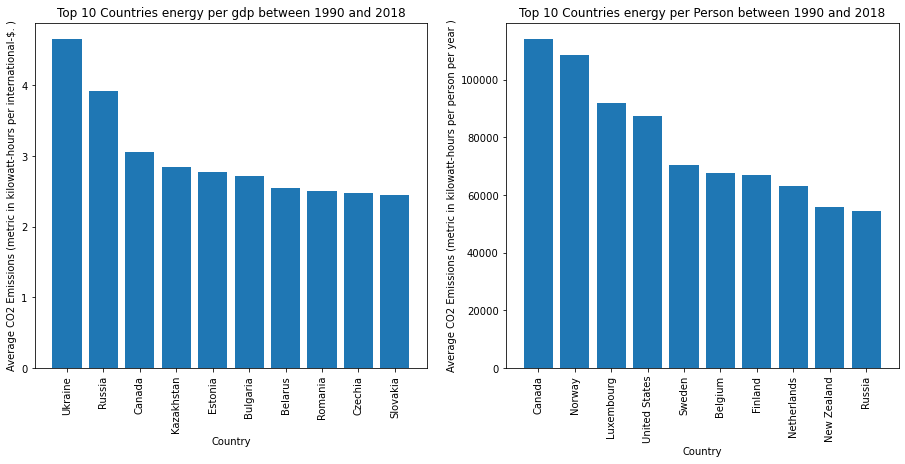

In [46]:
#
avg_by_country_energy_per_gdp = data_co2_country_nonull.groupby('country')['energy_per_gdp'].mean().sort_values(ascending=False)
avg_by_country_energy_per_capita = data_co2_country_nonull.groupby('country')['energy_per_capita'].mean().sort_values(ascending=False)

figure, axis = plt.subplots(1, 2, figsize=(15,6))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

plt.subplot(1,2,1), 
plt.bar(avg_by_country_energy_per_gdp.head(10).index, avg_by_country_energy_per_gdp.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric in kilowatt-hours per international-$. )')
plt.title('Top 10 Countries energy per gdp between 1990 and 2018')

plt.subplot(1,2,2), 
plt.bar(avg_by_country_energy_per_capita.head(10).index, avg_by_country_energy_per_capita.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric in kilowatt-hours per person per year )')
plt.title('Top 10 Countries energy per Person between 1990 and 2018')
plt.show()

## Now we will show the consumption co2 around the world in between (1990 - 2018)


In [47]:
data_co2_country_nonull['year'].max()

2018

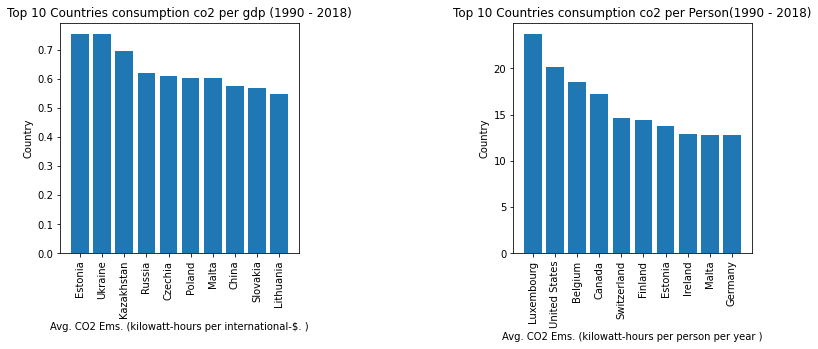

In [48]:
#
avg_by_country_consumption_co2_per_gdp = data_co2_country_nonull.groupby('country')['consumption_co2_per_gdp'].mean().sort_values(ascending=False)
avg_by_country_consumption_co2_per_capita = data_co2_country_nonull.groupby('country')['consumption_co2_per_capita'].mean().sort_values(ascending=False)
#
figure, axis = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.9,
                    hspace=0.4)
#
plt.subplot(1,2,1), 
plt.bar(avg_by_country_consumption_co2_per_gdp.head(10).index, avg_by_country_consumption_co2_per_gdp.head(10))
plt.xticks(rotation=90)
plt.ylabel('Country')
plt.xlabel('Avg. CO2 Ems. (kilowatt-hours per international-$. )')
plt.title('Top 10 Countries consumption co2 per gdp (1990 - 2018)')
#
plt.subplot(1,2,2), 
plt.bar(avg_by_country_consumption_co2_per_capita.head(10).index, avg_by_country_consumption_co2_per_capita.head(10))
plt.xticks(rotation=90)
plt.ylabel('Country')
plt.xlabel('Avg. CO2 Ems. (kilowatt-hours per person per year )')
plt.title('Top 10 Countries consumption co2 per Person(1990 - 2018)')
plt.show()

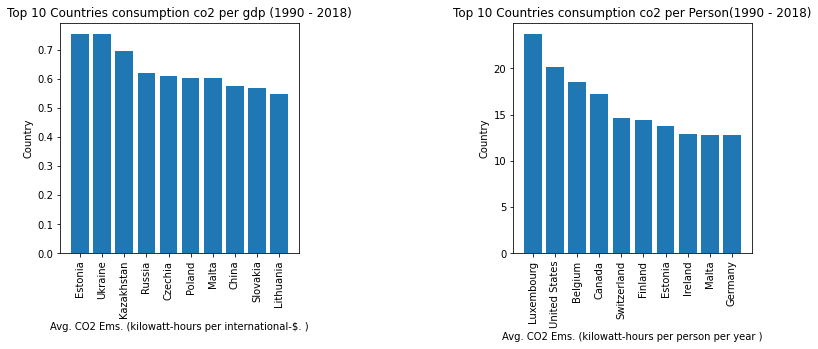

In [49]:
#avg_by_country_consumption_co2 = df_nonull.groupby('country')['consumption_co2'].mean().sort_values(ascending=False)
avg_by_country_consumption_co2_per_gdp = data_co2_country_nonull.groupby('country')['consumption_co2_per_gdp'].mean().sort_values(ascending=False)
avg_by_country_consumption_co2_per_capita = data_co2_country_nonull.groupby('country')['consumption_co2_per_capita'].mean().sort_values(ascending=False)

figure, axis = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.9,
                    hspace=0.4)

plt.subplot(1,2,1), 
plt.bar(avg_by_country_consumption_co2_per_gdp.head(10).index, avg_by_country_consumption_co2_per_gdp.head(10))
plt.xticks(rotation=90)
plt.ylabel('Country')
plt.xlabel('Avg. CO2 Ems. (kilowatt-hours per international-$. )')
plt.title('Top 10 Countries consumption co2 per gdp (1990 - 2018)')

plt.subplot(1,2,2), 
plt.bar(avg_by_country_consumption_co2_per_capita.head(10).index, avg_by_country_consumption_co2_per_capita.head(10))
plt.xticks(rotation=90)
plt.ylabel('Country')
plt.xlabel('Avg. CO2 Ems. (kilowatt-hours per person per year )')
plt.title('Top 10 Countries consumption co2 per Person(1990 - 2018)')
plt.show()

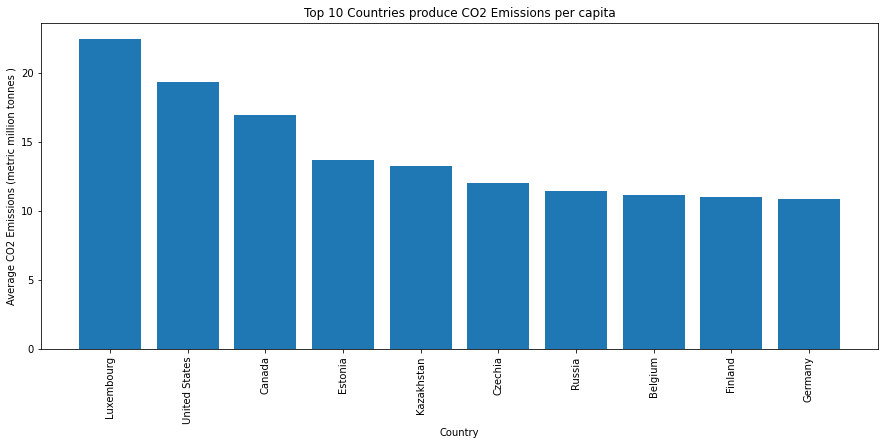

In [50]:
# Group the data by country and calculate the average CO2 emissions
avg_co2_by_country = data_co2_country_nonull.groupby('country')['co2_per_capita'].mean().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the highest average CO2 emissions
plt.figure(figsize=(15, 6))
#
plt.bar(avg_co2_by_country.head(10).index, avg_co2_by_country.head(10))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric million tonnes )')
plt.title('Top 10 Countries produce CO2 Emissions per capita')
plt.show()

In [51]:
co2_2021 = (data_co2_country[(data_co2_country['year']==2021) & (data_co2_country['co2']>=1000)]) 
co2_2020 = (data_co2_country[(data_co2_country['year']==2020) & (data_co2_country['co2']>=1000)]) 
co2_2019 = (data_co2_country[(data_co2_country['year']==2019) & (data_co2_country['co2']>=1000)]) 
co2_2018 = (data_co2_country[(data_co2_country['year']==2018) & (data_co2_country['co2']>=1000)]) 


In [52]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

# add both charts to figure
fig.add_trace(go.Pie(labels=co2_2018['country'], values=co2_2018['co2'], title ='Co2 Emissions in 2018'),
                1, 1)
fig.add_trace(go.Pie(labels=co2_2019['country'], values=co2_2019['co2'], title ='Co2 Emissions in 2019'),
                1, 2)
# add both charts to figure
fig.add_trace(go.Pie(labels=co2_2020['country'], values=co2_2020['co2'], title ='Co2 Emissions in 2020'),
                2, 1)
fig.add_trace(go.Pie(labels=co2_2021['country'], values=co2_2021['co2'], title ='Co2 Emissions in 2021'),
                2, 2)
# make donut chart

fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(title_text="Global Emissions 2018-2021", 
    autosize=False,
    width=800,
    height=800, font_size=14
        
)

fig.show()

In [53]:
data_co2_country['year'].min()

1950

## If we analyze further for the United States and China only :


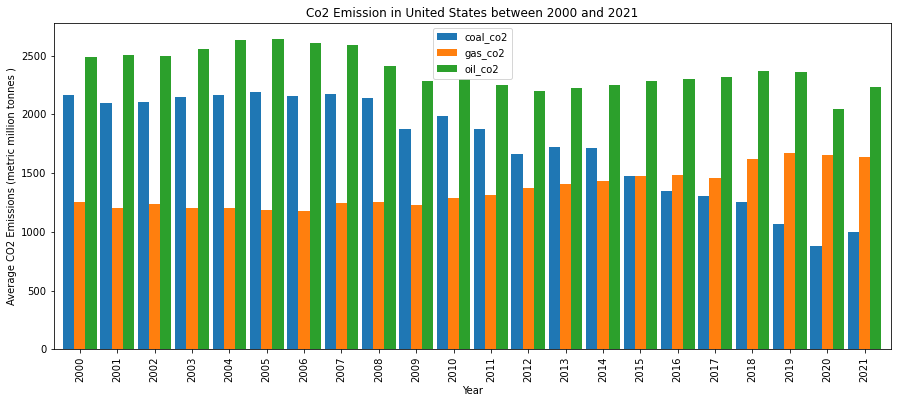

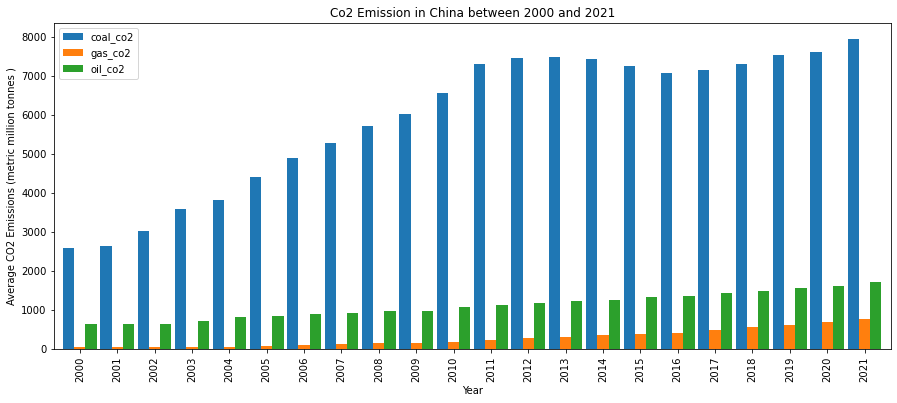

In [54]:
df_nonull = df.dropna() 
co2_USA = data_co2_country[(data_co2_country['country']=='United States') & (data_co2_country['year']>=2000)]
co2_China = data_co2_country[(data_co2_country['country']=='China') & (data_co2_country['year']>=2000)]
#
co2_USA [['year', 'coal_co2', 'gas_co2', 'oil_co2']].plot(x='year', kind='bar', figsize=(15,6), width =.9)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (metric million tonnes )')
plt.title('Co2 Emission in United States between 2000 and 2021')
plt.show()
#
#plt.subplot(1,2,2), 

co2_China [['year', 'coal_co2', 'gas_co2', 'oil_co2']].plot(x='year', kind='bar', figsize=(15,6), width =.9)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (metric million tonnes )')
plt.title('Co2 Emission in China between 2000 and 2021')

plt.show()

# <font color='blue'>   Correlation </font>

## We find out the correlation between some columns:

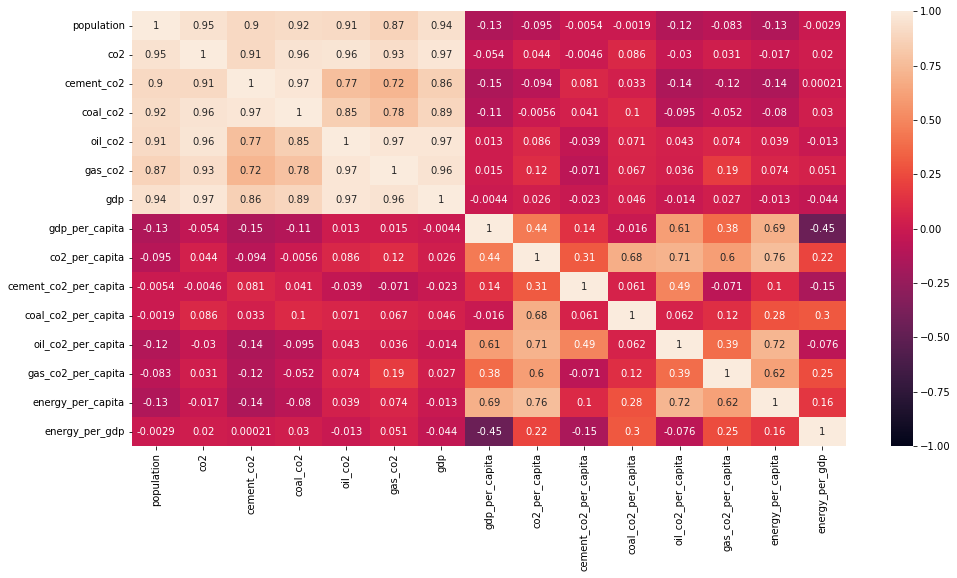

In [55]:
# Fltered datefram according to spiciefic columns

df_co2_corr = data_nonull[['population','co2','cement_co2','coal_co2', 'oil_co2', 
                  'gas_co2', "gdp", 'gdp_per_capita', 'co2_per_capita', 'cement_co2_per_capita',
                  'coal_co2_per_capita', 'oil_co2_per_capita','gas_co2_per_capita',
                   'energy_per_capita', 'energy_per_gdp'] ]
                 
plt.figure(figsize=(16,8))
sns.heatmap(df_co2_corr.corr(), vmin=-1, vmax=1, annot=True);


In [56]:
 data_nonull.isna().sum().sum()

0

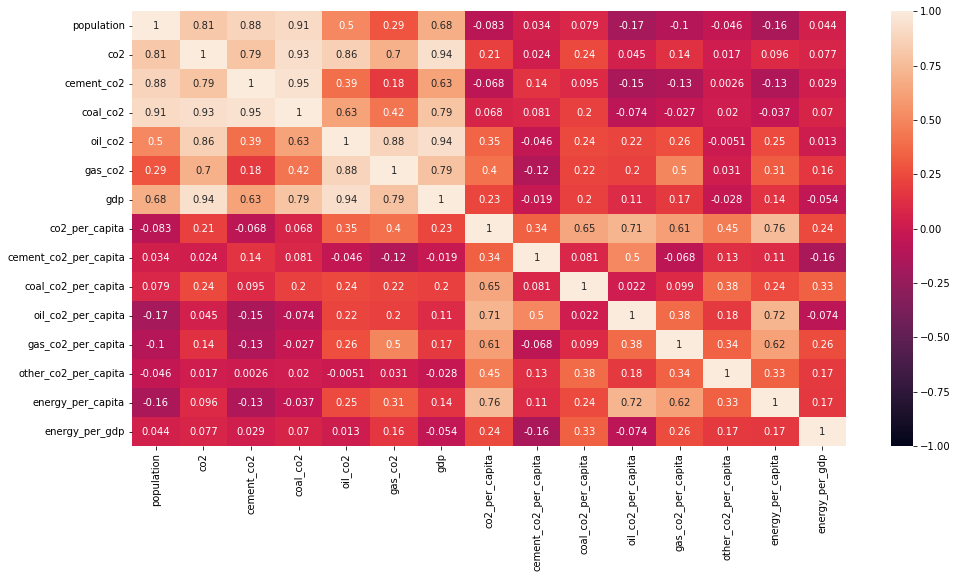

In [57]:
# Fltered datefram according to spiciefic variables
#
df_co2_corr = data_co2_country_nonull[['population','co2','cement_co2','coal_co2', 'oil_co2', 
                  'gas_co2',"gdp", 'co2_per_capita', 'cement_co2_per_capita',
                  'coal_co2_per_capita', 'oil_co2_per_capita','gas_co2_per_capita',
                  'other_co2_per_capita', 'energy_per_capita', 'energy_per_gdp']]
                 
plt.figure(figsize=(16,8))
sns.heatmap(df_co2_corr.corr(), vmin=-1, vmax=1, annot=True);


## Conclusions 
According to the above analyses, one can conclude that the Earth's temperature is rising. Ice sheets are melting and sea levels are increasing.
The Earth's climate is changing, a result of global warming caused by increasing greenhouse gases like Co2 in the Earth's atmosphere. We also saw that every country contributes to CO2 emissions in different magnitudes.

CO2 emissions (metric ton per capita) is good metric for measuring relative improvements between countries with different population sizes, however absolute CO2 emissions (kt) is the most important metric when considering which countries have the most impact on global emissions.